In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
np.random.seed(0)
plt.style.use("ggplot")
import tensorflow as tf
#print('Tensorflow version:', tf.__version__)
#print('GPU detected:', tf.config.list_physical_devices('GPU'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## read the BI label data
label_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BI_train.tsv", sep="\t", dtype=str, keep_default_na=False, na_values=[""], quoting=csv.QUOTE_NONE)

## read the unlabel data
unlabel_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Listing_Titles.tsv", sep="\t", dtype=str, keep_default_na=False, na_values=[""], quoting=csv.QUOTE_NONE)

In [ ]:
label_data.head(20)

,Record.Number,Title,Token,Tag
0,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,B-Modell
1,1,Supreme Nike SB Dunk High By any Means Red US1...,Nike,B-Marke
2,1,Supreme Nike SB Dunk High By any Means Red US1...,SB,B-Produktlinie
3,1,Supreme Nike SB Dunk High By any Means Red US1...,Dunk,I-Produktlinie
4,1,Supreme Nike SB Dunk High By any Means Red US1...,High,B-Schuhschaft-Typ
5,1,Supreme Nike SB Dunk High By any Means Red US1...,By,B-Modell
6,1,Supreme Nike SB Dunk High By any Means Red US1...,any,I-Modell
7,1,Supreme Nike SB Dunk High By any Means Red US1...,Means,I-Modell
8,1,Supreme Nike SB Dunk High By any Means Red US1...,Red,B-Farbe
9,1,Supreme Nike SB Dunk High By any Means Red US1...,US10,B-US-Schuhgröße


In [ ]:
unlabel_data.head(20)

,Record Number,Title
0,1,Supreme Nike SB Dunk High By any Means Red US1...
1,2,New Balance 530 Männer und Frauen Laufschuhe m...
2,3,♥ MICHAEL KORS Sneaker Gr 39 ♥
3,4,New Balance ML 574 EGO Turnschuhe grün
4,5,"Nike air jordan 9 og , space jam , hare , bugs..."
5,6,NEU SKECHERS Damen Sneakers Turnschuhe Memory ...
6,7,New Balance 550 White Green
7,8,CAT CATERPILLAR Arise Sneaker Freizeitschuhe T...
8,9,Adidas NMD R1 STLT PK Primeknit Sneaker Turnsc...
9,10,Damen Sneaker Mesh Sportschuhe Laufschuhe Slip...


In [ ]:
## create a dictionary of words

long_string = " ".join(unlabel_data['Title'])
ger_dict = list(set(long_string.split()))
ger_dict.append("ENDPAD")

In [ ]:
## create a dictionary of tags
tag_dict = list(set(label_data['Tag']))
tag_dict.append("I-Laufsohlenmaterial")
tag_dict.append("I-Obscure")
tag_dict.append("I-Schuhweite")
tag_dict.append("I-Stollentyp")
#tag_dict_demo = list(set(label_data['Tag'].str[2:]))

#ger_dict[0:20]
#sorted(tag_dict_demo)
sorted(tag_dict)

['B-Abteilung',
 'B-Aktivität',
 'B-Akzente',
 'B-Anlass',
 'B-Besonderheiten',
 'B-Charakter',
 'B-Charakter Familie',
 'B-Dämpfungsgrad',
 'B-EU-Schuhgröße',
 'B-Erscheinungsjahr',
 'B-Farbe',
 'B-Futtermaterial',
 'B-Gewebeart',
 'B-Herstellernummer',
 'B-Herstellungsland und -region',
 'B-Innensohlenmaterial',
 'B-Jahreszeit',
 'B-Laufsohlenmaterial',
 'B-Marke',
 'B-Maßeinheit',
 'B-Modell',
 'B-Muster',
 'B-No Tag',
 'B-Obermaterial',
 'B-Obscure',
 'B-Produktart',
 'B-Produktlinie',
 'B-Schuhschaft-Typ',
 'B-Schuhweite',
 'B-Stil',
 'B-Stollentyp',
 'B-Thema',
 'B-UK-Schuhgröße',
 'B-US-Schuhgröße',
 'B-Verschluss',
 'B-Zwischensohlen-Typ',
 'I-Abteilung',
 'I-Aktivität',
 'I-Akzente',
 'I-Anlass',
 'I-Besonderheiten',
 'I-Charakter',
 'I-Charakter Familie',
 'I-Dämpfungsgrad',
 'I-EU-Schuhgröße',
 'I-Erscheinungsjahr',
 'I-Farbe',
 'I-Futtermaterial',
 'I-Gewebeart',
 'I-Herstellernummer',
 'I-Herstellungsland und -region',
 'I-Innensohlenmaterial',
 'I-Jahreszeit',
 'I-Laufsoh

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.m_sent = 1
        self.data = data
        # splitting the cols of a sentence into token and tag
        agg_func = lambda s: [(w,t) for w,t in zip(s['Token'].values.tolist(),
                                                  s['Tag'].values.tolist())]
        self.grouped = self.data.groupby("Record.Number").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [ ]:
getter = SentenceGetter(label_data)
sentences = getter.sentences
sentences[0]

[('Supreme', 'B-Modell'),
 ('Nike', 'B-Marke'),
 ('SB', 'B-Produktlinie'),
 ('Dunk', 'I-Produktlinie'),
 ('High', 'B-Schuhschaft-Typ'),
 ('By', 'B-Modell'),
 ('any', 'I-Modell'),
 ('Means', 'I-Modell'),
 ('Red', 'B-Farbe'),
 ('US10', 'B-US-Schuhgröße'),
 ('EU44', 'B-EU-Schuhgröße'),
 ('Supreme', 'B-No Tag'),
 ('Box', 'B-No Tag'),
 ('Logo', 'B-Akzente'),
 ('Air', 'B-Produktlinie'),
 ('Force', 'I-Produktlinie')]

In [ ]:
ger_label_dict = list(set(label_data['Token']))
train2idx = {w: i+1 for i, w in enumerate(ger_label_dict)}
tag2idx = {w: i for i, w in enumerate(tag_dict)}
ger2idx = {w: i+1 for i, w in enumerate(ger_dict)}
BI2idx = {"B":0, "I": 1}

In [ ]:
#ger2idx

In [ ]:
#tag2idx

In [ ]:
## plot the length of each titles, commented out for debugging efficiency
# plt.hist(unlabel_data["Title"].str.len(), bins=20)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len = 104

for s in sentences:
  for w in s:
    if not w[0] in ger2idx:
      print(s)
      print(w)

X = [[ger2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding='post', value= len(ger_dict)-1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding='post', value=tag2idx["B-No Tag"])
y = [to_categorical(i, num_classes=len(tag_dict)) for i in y]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install livelossplot

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-fjeq5hfq
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-fjeq5hfq
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=a94cbc2a6b40a5cbeeb064c468fbae70c8d984cfe470aef6603f3bed09568447
  Stored in directory: /tmp/pip-ephem-wheel-cache-ob593bbl/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
# from keras_contrib.layers import CRF
# from keras_contrib.losses import crf_loss
# from keras_contrib.metrics import crf_viterbi_accuracy

In [ ]:
## creating a bi-directional RNN with CRF
input_word = Input(shape=(max_len, ))
model = Embedding(input_dim=len(ger_dict), output_dim=max_len, input_length=max_len)(input_word)
model = SpatialDropout1D(.1)(model)
model = Bidirectional(LSTM(units=1200, return_sequences=True, recurrent_dropout=.1))(model)
out = TimeDistributed(Dense(len(tag_dict), activation = 'softmax'))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 104)]             0         
                                                                 
 embedding (Embedding)       (None, 104, 104)          196355536 
                                                                 
 spatial_dropout1d (Spatial  (None, 104, 104)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 104, 2400)         12528000  
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 104, 72)           172872    
 ributed)                                                        
                                                             

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

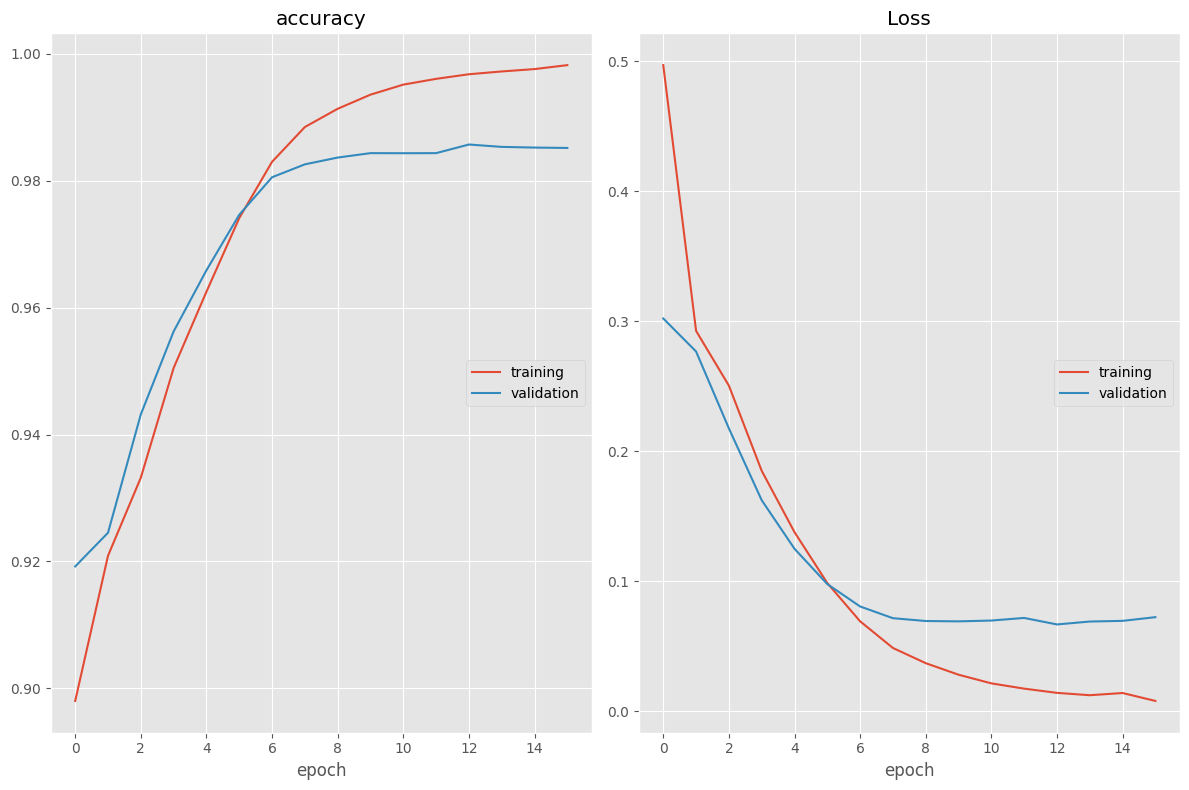

accuracy
	training         	 (min:    0.898, max:    0.998, cur:    0.998)
	validation       	 (min:    0.919, max:    0.986, cur:    0.985)
Loss
	training         	 (min:    0.008, max:    0.497, cur:    0.008)
	validation       	 (min:    0.067, max:    0.302, cur:    0.073)
50/50 [==============================] - 18s 367ms/step - loss: 0.0081 - accuracy: 0.9982 - val_loss: 0.0725 - val_accuracy: 0.9852


In [ ]:
#TODO: kinda overfit. Fix (by regularlization or sth)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=0, mode='max', restore_best_weights=False)
callbacks = [PlotLossesCallback(), early_stopping]

history = model.fit(
    x_train, np.array(y_train),
    validation_split=.2,
    batch_size=64,
    epochs=20,
    verbose=1,
    callbacks=callbacks
)

In [ ]:
model.evaluate(x_test, np.array(y_test))

32/32 [==============================] - 2s 62ms/step - loss: 0.0762 - accuracy: 0.9843


[0.0761532410979271, 0.9843173027038574]

In [ ]:
predict = []

for i in range(92299, len(unlabel_data['Title'])):
    word_indices = []
    for word in unlabel_data['Title'][i].split():
        word_indices.append(ger2idx[word])
    predict.append(word_indices)

predict = pad_sequences(maxlen=max_len, sequences=predict, padding='post', value= len(ger_dict)-1)

In [ ]:
#grouped_token = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grouped_token.tsv", sep="\t", dtype=str, keep_default_na=False, na_values=[""], quoting=csv.QUOTE_NONE)
#grouped_token.head(20)

In [ ]:
# open("submit.tsv", "w").close()

In [ ]:
# tag = []
# tag.append([grouped_token['Tag'][0], grouped_token['Token'][0]])
# for i in range(1, len(grouped_token['Token'])):
#   if grouped_token['Record.Number'][i] != grouped_token['Record.Number'][i-1]:
#     tag = sorted(tag, key=lambda x: x[0])
#     with open("submit.tsv", "a", newline="") as f:
#       writer = csv.writer(f, delimiter='\t')
#       for element in tag:
#         writer.writerow([grouped_token['Record.Number'].iloc[i-1], element[0], element[1]])
#     tag = []
#   else:
#     tag.append([grouped_token['Tag'].iloc[i], grouped_token['Token'].iloc[i]])

# with open("submit.tsv", "a", newline="") as f:
#       writer = csv.writer(f, delimiter='\t')
#       for element in tag:
#         writer.writerow([grouped_token['Record.Number'].iloc[i], element[0], element[1]])

In [ ]:
#TODO: write the prediction to the 'submit.tsv' file
#if the first word in a title is tagged "I", change it to "B"(temporary sol)
#merge the word with "I" tag to the previous "B" tag
#write with the format as Record.Number-Tag-Token

#begin with 92301 but should begin with 92300
tokens_tag = []
k=0
for i in range(92299,  len(unlabel_data['Title'])):
    tokens_tag = []
    p = model.predict(np.array([predict[i-92299]]))
    p = np.argmax(p, axis=-1)
    list_length = len(unlabel_data['Title'][i].split())

    token = ""
    # print(p[0][0])  # see the value of the index
    # print(len(tag_dict))  # see the length of tag_dict
    # print(tag_dict[p[0][0]])
    if tag_dict[p[0][0]][0] == "I":
        p[0][0] = tag_dict.index("B" + tag_dict[p[0][0]][1::])

    previous_tag = ""
    for tok, pred in zip(predict[i-92299][0:list_length], p[0][0:list_length]):
        if tag_dict[pred][0] == "B":
            if token:  # Check if token is not empty
                tokens_tag.append([previous_tag, token])
            token = ger_dict[tok-1]
            previous_tag = tag_dict[pred]
        elif tag_dict[pred][0] == "I":
            token += " " + ger_dict[tok-1]

    if token:  # To add the last token-tag pair
        tokens_tag.append([previous_tag, token])

    tokens_tag = sorted(tokens_tag, key=lambda x: x[0])  # Removed the [1::] slice since it may skip necessary items
    with open("/content/drive/MyDrive/Colab Notebooks/submit.tsv", "a", newline="") as f:
        writer = csv.writer(f, delimiter='\t')
        for element in tokens_tag:
            writer.writerow([i+1, element[0][2::], element[1]])
    k = i+1

with open("/content/drive/MyDrive/Colab Notebooks/submit.tsv", "a", newline="") as f:
    writer = csv.writer(f, delimiter='\t')
    for element in tokens_tag:
        writer.writerow([k, element[0][2::], element[1]])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 84ms/step


In [ ]:
!zip -r '/content/drive/MyDrive/Colab Notebooks/submit.zip' '/content/submit.tsv'